# Creating age groups

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os

## Creating path for folder

In [6]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [9]:
# Importing subset with only high activity customers

In [11]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [9]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region'],
      dtype='object')

In [10]:
instacart.shape

(30963518, 25)

## 1. Creating 4 age groups

In [12]:
# Stratifying Age in 4 groups:

# age <= 21 =  very young 
# 21 > age <=40 = young 
# 40 > age <= 65 = mature 
# age >65 = senior

In [13]:
age_group = [
    'very young' if value <= 21 else 
    'young' if 21 < value <= 40 else 
    'mature' if 40 < value <= 65 else 
    'senior'
    for value in instacart['Age']
]

In [14]:
# adding new column to instacart dataframe

instacart['age_group'] = age_group

In [15]:
instacart['age_group'].value_counts(dropna = False)

age_group
mature        12084951
young          9204241
senior         7730544
very young     1943782
Name: count, dtype: int64

## 2. Creating a bar chart of age distribution

In [13]:
# Creating a subset with unique entries for each user_id

bar_age_groups = instacart[['age_group', 'user_id']]

In [15]:
bar_age_groups.shape

(30963518, 2)

In [17]:
# Creating a subset withou duplicates

bar_age_groups_nodups = bar_age_groups.drop_duplicates()

In [18]:
bar_age_groups_nodups.shape

(162631, 2)

In [21]:
bar_age_groups_nodups['age_group'].value_counts(dropna = False)

age_group
mature        63674
young         48052
senior        40769
very young    10136
Name: count, dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

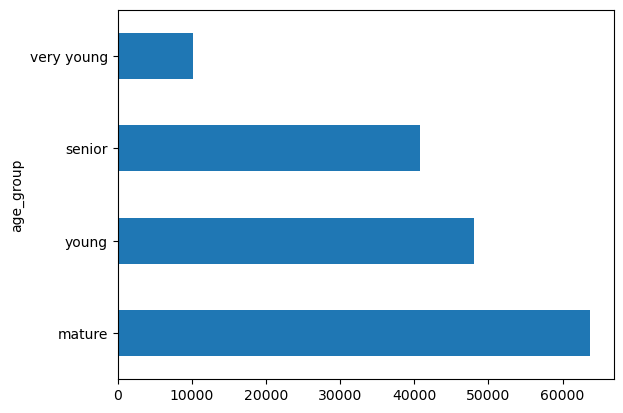

In [73]:
#Creating a bar chart

age_groups_bar = bar_age_groups_nodups['age_group'].value_counts().plot.barh()

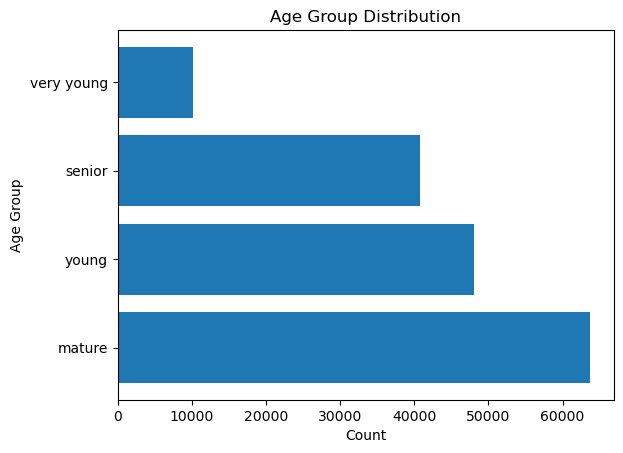

In [57]:
age_group_counts = bar_age_groups_nodups['age_group'].value_counts()
plt.barh(age_group_counts.index, age_group_counts.values)  # Horizontal bars
plt.xlabel("Count")  # Label x-axis
plt.ylabel("Age Group")  # Label y-axis
plt.title("Age Group Distribution")  # Chart title
plt.show()

In [71]:
# exporting plot

plt.savefig(os.path.join(path, 'Analysis', 'Final Visualization', 'age_groups_counts.png'))

<Figure size 640x480 with 0 Axes>

In [77]:
# exporting plot

age_groups_bar.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'age_groups_bar.jpeg'))

## 3. Exporting 

In [25]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [46]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'backup', 'IC_high_activity_2.pkl'))